In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold

from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [18]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]


In [51]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_test[11].astype(np.float64))
y=np.array(y_test[12].astype(np.float64))
z=np.array(y_test[13].astype(np.float64))

x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
x_test=x_test.astype(np.float64)
y_test=y_test.astype(np.float64)

def MEE(x, y):
    return np.mean(np.linalg.norm(x - y, 2, axis=1))


Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 2/5] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.810) total time=   0.0s[CV 3/5] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.484) total time=   0.0s

[CV 1/5] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.823) total time=   0.0s
[CV 4/5] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.814) total time=   0.0s
[CV 5/5] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.675) total time=   0.0s
[CV 1/5] END metric=l1, n_neighbors=2, weights=distance;, score=(train=-0.000, test=-3.132) total time=   0.0s
[CV 2/5] END metric=l1, n_neighbors=2, weights=distance;, score=(train=-0.000, test=-2.980) total time=   0.0s
[CV 3/5] END metric=l1, n_neighbors=2, weights=distance;, score=(train=-0.000, test=-2.845) total time=   0.0s
[CV 4/5] END metric=l1, n_neighbors=2, weights=dis

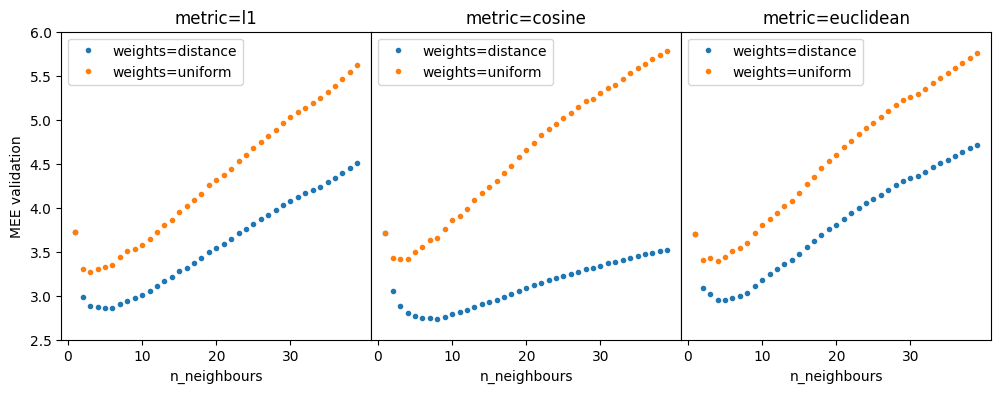

In [73]:
n_neigh=np.arange(1,40,1)
plt.figure(1,(12,4))

w=['distance', 'uniform']
for weights in w:


    mis=['l1','cosine','euclidean']
    for i,metric in enumerate(mis):
        parameters_KNN = {
        'n_neighbors': n_neigh,
        'weights': [weights],
        'metric': [metric]
    }
        grid_search_KNN = GridSearchCV(
            estimator=KNeighborsRegressor(),
            param_grid=parameters_KNN,
            refit=True,
            cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
            n_jobs=-1,
            return_train_score = True,
            verbose=3,
            scoring=make_scorer(MEE, greater_is_better=False),
        )
            
        KNN=grid_search_KNN.fit(x_train, y_train)
        cv_results_df = pd.DataFrame(grid_search_KNN.cv_results_)
        error=cv_results_df['mean_test_score'].values
        plt.subplot(1,3,i+1)
        plt.subplots_adjust(wspace=0)
        if i==0:
            plt.ylabel('MEE validation')
        else:
            plt.yticks([])
        plt.title('metric='+metric)
        plt.errorbar(n_neigh,-error,label='weights='+weights,marker='.',linestyle='')
        plt.xlabel('n_neighbours')
        plt.ylim(2.5,6)
        plt.xticks([0,10,20,30])
        plt.legend()

plt.show()

In [47]:


#make_scorer(MEE, greater_is_better=False)

n_neigh=np.arange(1,30,1)
parameters_KNN = {
    'n_neighbors': n_neigh,
    'weights': ('uniform','distance'),
    'metric': ('l1','cosine','euclidean','cityblock')
}      
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=parameters_KNN,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring=make_scorer(MEE, greater_is_better=False),
)

In [48]:
KNN=grid_search_KNN.fit(x_train, y_train)
print(grid_search_KNN.best_params_) 
print('Best Score - Validation:', grid_search_KNN.best_score_ )

y_pred =KNN.predict(x_test)

print('Accuracy Score - SVM - Test-error:', metrics.mean_squared_error(y_test, y_pred))
cv_results_df = pd.DataFrame(grid_search_KNN.cv_results_)
cv_results_df


Fitting 25 folds for each of 116 candidates, totalling 2900 fits
[CV 2/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.810) total time=   0.0s
[CV 1/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.823) total time=   0.0s
[CV 5/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.675) total time=   0.0s[CV 4/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.814) total time=   0.0s

[CV 6/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.444) total time=   0.0s
[CV 3/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.484) total time=   0.0s
[CV 7/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.787) total time=   0.0s
[CV 8/25] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.685) total time=   0.0s
[CV 9/25] END metric=l1, n_neighbors=1, weights

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.004402,0.001237,0.003897,0.001041,l1,1,uniform,"{'metric': 'l1', 'n_neighbors': 1, 'weights': ...",-3.823260,-3.810041,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.004400,0.002270,0.004215,0.002364,l1,2,uniform,"{'metric': 'l1', 'n_neighbors': 2, 'weights': ...",-3.429793,-3.304351,...,-1.840976,-1.830110,-1.794250,-1.788176,-1.818046,-1.835416,-1.878905,-1.854406,-1.819291,0.030367
2,0.004460,0.001857,0.005548,0.004279,l1,3,uniform,"{'metric': 'l1', 'n_neighbors': 3, 'weights': ...",-3.362764,-3.286116,...,-2.130504,-2.242554,-2.161755,-2.203897,-2.151682,-2.196762,-2.156117,-2.154526,-2.184499,0.048176
3,0.006003,0.004690,0.004714,0.002410,l1,4,uniform,"{'metric': 'l1', 'n_neighbors': 4, 'weights': ...",-3.349026,-3.275190,...,-2.379044,-2.470984,-2.396169,-2.421898,-2.395577,-2.430008,-2.425307,-2.426813,-2.406617,0.035977
4,0.004770,0.001879,0.004534,0.001718,l1,5,uniform,"{'metric': 'l1', 'n_neighbors': 5, 'weights': ...",-3.465063,-3.354473,...,-2.543413,-2.648629,-2.558898,-2.561053,-2.579102,-2.638356,-2.572477,-2.535681,-2.572214,0.037393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.004021,0.002423,0.004998,0.002382,cityblock,25,uniform,"{'metric': 'cityblock', 'n_neighbors': 25, 'we...",-4.593398,-5.012820,...,-4.311597,-4.460353,-4.289016,-4.424414,-4.330399,-4.368291,-4.338891,-4.300564,-4.358348,0.043509
112,0.002746,0.000422,0.004800,0.003881,cityblock,26,uniform,"{'metric': 'cityblock', 'n_neighbors': 26, 'we...",-4.627323,-5.079826,...,-4.385506,-4.534893,-4.359971,-4.487147,-4.430698,-4.420255,-4.420752,-4.390001,-4.433437,0.041376
113,0.003804,0.002671,0.004548,0.002043,cityblock,27,uniform,"{'metric': 'cityblock', 'n_neighbors': 27, 'we...",-4.676606,-5.147042,...,-4.459414,-4.620429,-4.448522,-4.572135,-4.501664,-4.495637,-4.484501,-4.467779,-4.505496,0.045796
114,0.003114,0.001108,0.005005,0.003211,cityblock,28,uniform,"{'metric': 'cityblock', 'n_neighbors': 28, 'we...",-4.745668,-5.257233,...,-4.535386,-4.692778,-4.541263,-4.663246,-4.571515,-4.581162,-4.549106,-4.523225,-4.579491,0.048315


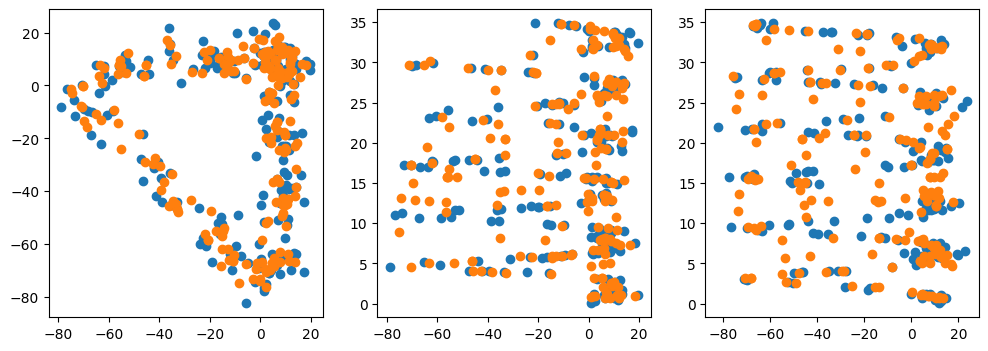

In [49]:
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred[:,0],y_pred[:,1])
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred[:,0],y_pred[:,2])
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred[:,1],y_pred[:,2])